<a href="https://colab.research.google.com/github/botastark/CV/blob/main/CVpart2byBotaDuisenbay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.1 Sobel


2.1 Implement the convolution of an image with a Sobel derivative filter using the Fourier transform. An implementation of the convolution is in the videos.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from skimage.util import pad
import imageio
from scipy import ndimage
from scipy.ndimage import gaussian_filter
from scipy.ndimage import sobel

In [2]:
#Load an image
img = imageio.imread('drive/My Drive/Colab Notebooks/images.jpeg')
plt.figure(1)
plt.imshow(img)
#Convert RGB to greyscale
from skimage import data
from skimage.color import rgb2gray
grayscale = rgb2gray(img)
plt.figure(2)
plt.imshow(grayscale, cmap=plt.cm.gray)


FileNotFoundError: ignored

In [ ]:
#Sobel Filter matrix
k = 2
# Gx = np.zeros((2*k+1, 2*k+1, 3))
# Gy = np.zeros((2*k+1, 2*k+1, 3))
kernel_x = np.zeros((2*k+1, 2*k+1))
for j in range(-k,k+1):
  for i in range(-k,k+1):
    if i == 0 and j == 0:
      kernel_x[2,2]=0
    else:
      kernel_x[i+2,j+2]=j/(i*i+j*j)
kernel_y = np.transpose(kernel_x)

In [ ]:
# Padding
sz = (img.shape[0] - kernel_x.shape[0], img.shape[1] - kernel_x.shape[1])  # total amount of padding
kernel_x = pad(kernel_x, (((sz[0]+1)//2, sz[0]//2), ((sz[1]+1)//2, sz[1]//2)), 'constant')
kernel_y = pad(kernel_y, (((sz[0]+1)//2, sz[0]//2), ((sz[1]+1)//2, sz[1]//2)), 'constant')
# kernel_X.shape

In [ ]:
#import for FT
from scipy import fftpack

In [ ]:
# Sobel for greyscale
filtered_grey = np.zeros(grayscale.shape)
# kernel = fftpack.ifftshift(kernel)
kernel_x = fftpack.ifftshift(kernel_x)
kernel_y = fftpack.ifftshift(kernel_y)

filtered_greyX = np.real(fftpack.ifft2(fftpack.fft2(grayscale) * fftpack.fft2(kernel_x)))
filtered_greyX= filtered_greyX+np.imag(fftpack.ifft2(fftpack.fft2(grayscale) * fftpack.fft2(kernel_x)))
filtered_greyX.transpose()

filtered_greyY = np.real(fftpack.ifft2(fftpack.fft2(grayscale) * fftpack.fft2(kernel_y)))
filtered_greyY= filtered_greyY+np.imag(fftpack.ifft2(fftpack.fft2(grayscale) * fftpack.fft2(kernel_y)))
filtered_greyY.transpose()


filtered_grey = np.sqrt(pow(filtered_greyX, 2.0) + pow(filtered_greyY, 2.0))
filtered_grey=np.maximum(0,np.minimum(filtered_grey,255))


plt.figure(3)
plt.imshow(filtered_grey, cmap=plt.cm.gray)


#2.1 LOG and Laplacian filters

Given an image A use the convolution with the LoG filter, implemented as in the previous exercise, to obtain the edges of the image, do the same using the Sobel filter and the Laplacian.
 Sobel is in prev ex

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from skimage.util import pad
import imageio
from scipy import ndimage
from scipy.ndimage import gaussian_filter
from scipy.ndimage import sobel

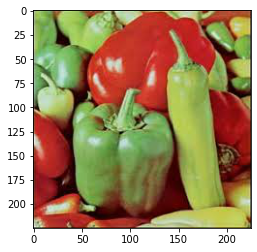

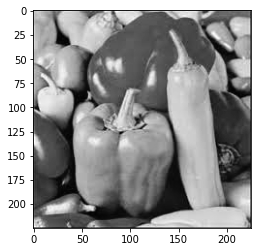

In [ ]:
#Load an image
img = imageio.imread('drive/My Drive/Colab Notebooks/images.jpeg')
plt.figure(1)
plt.imshow(img)
#Convert RGB to greyscale
from skimage import data
from skimage.color import rgb2gray
grayscale = rgb2gray(img)
plt.figure(2)
plt.imshow(grayscale, cmap=plt.cm.gray)

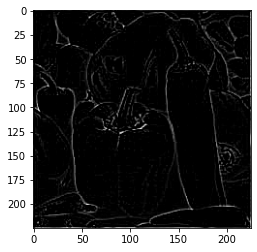

In [ ]:
#LOG filter kernel
s, k = 0.7, 2
pi = np.pi

Log = np.array( [[-1/pi/pow(s, 4)*(1-(x*x+y*y)/2/pow(s, 2))*np.exp(-(pow(x, 2)+pow(y, 2))/2/pow(s, 2)) for x in range(-k, k+1)] for y in range(-k,k+1)])
# Padding
sz = (img.shape[0] - Log.shape[0], img.shape[1] - Log.shape[1])  # total amount of padding
Log = pad(Log, (((sz[0]+1)//2, sz[0]//2), ((sz[1]+1)//2, sz[1]//2)), 'constant')

# Convolution using Fourier

filtered_grey = np.zeros(grayscale.shape)
Log = fftpack.ifftshift(Log)
filtered_grey = np.real(fftpack.ifft2(fftpack.fft2(grayscale) * fftpack.fft2(Log)))
filtered_grey= filtered_grey+np.imag(fftpack.ifft2(fftpack.fft2(grayscale) * fftpack.fft2(Log)))
filtered_grey.transpose()
filtered_grey=np.maximum(0,np.minimum(filtered_grey,255))

plt.figure(3)
plt.imshow(filtered_grey, cmap=plt.cm.gray)




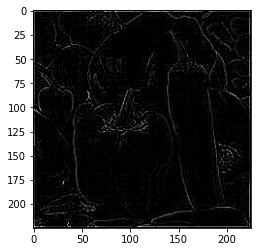

In [ ]:
#laplacian kernel 3 by 3
L = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
# Padding
sz = (img.shape[0] - L.shape[0], img.shape[1] - L.shape[1])  # total amount of padding
L = pad(L, (((sz[0]+1)//2, sz[0]//2), ((sz[1]+1)//2, sz[1]//2)), 'constant')

# Convolution using Fourier
filtered_grey = np.zeros(grayscale.shape)
L = fftpack.ifftshift(L)
filtered_grey = np.real(fftpack.ifft2(fftpack.fft2(grayscale) * fftpack.fft2(L)))
filtered_grey= filtered_grey+np.imag(fftpack.ifft2(fftpack.fft2(grayscale) * fftpack.fft2(L)))
filtered_grey.transpose()
filtered_grey=np.maximum(0,np.minimum(filtered_grey,255))

plt.figure(3)
plt.imshow(filtered_grey, cmap=plt.cm.gray)



#2.2 Histogram

2.2  Take an image, transform it into a gray image. Lower its resolution, applying also a Gaussian filter so that the intensity value is reduced. Implement the histogram equalization, note that it amounts just to compute the formula (*) reported in slide 7 of Video Histogram and Entropy. Show the intensity values of the probabilities before and after in a table. Compute the entropy of the image, before and after the equalization.

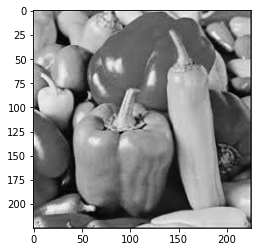

In [ ]:
import numpy as np
from PIL import Image
# Step 1 Open the image and transform to greyscale

image = np.array(Image.open('drive/My Drive/Colab Notebooks/images.jpeg')).astype(np.uint8)
plt.figure(1)
plt.imshow(image)

grey = np.zeros((image.shape[0],image.shape[1]));
for r in range(len(image)): 
    for c in range(len(image[r])): 
        grey[r][c] = (0.299*image[r][c][0]+0.587*image[r][c][1]+0.114*image[r][c][2])/3

plt.imshow(grey,  cmap='gray') 
plt.show()

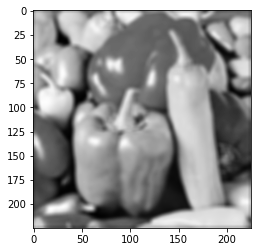

In [ ]:
# Step 2 Lower its resolution, applying also a Gaussian filter so that the intensity value is reduced. 
avg_d = np.zeros(grey.shape)
averaged = np.ones([5,5])/25

s, k = 0.7, 2
pi = np.pi
oneG = [np.exp(-z*z/(2*s*s))/np.sqrt(2*pi*s*s) for z in range(-k, k+1)]
kernel = np.zeros((5,5))
kernel_ = np.outer(oneG,oneG)
kernel = kernel_/np.sum(kernel_)

avg_d_gaussian = np.zeros(grey.shape, dtype = int)
avg_d_gaussian = ndimage.convolve(ndimage.convolve(grey,averaged ),kernel)
plt.figure(6)

plt.imshow(avg_d_gaussian, cmap='gray')



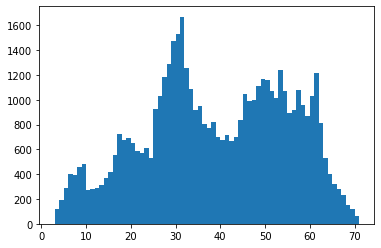

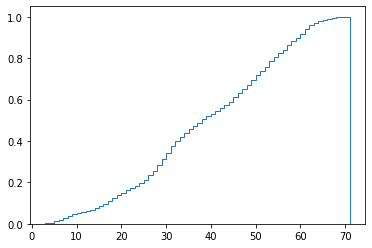

In [ ]:
#Histogram before equalization

avg_im = avg_d_gaussian.astype(int)
b = avg_im.max()-avg_im.min()
n, bins, patches = plt.hist(avg_im.ravel(), bins = b,histtype='bar')
plt.show()
cdf, bins, patches = plt.hist(avg_im.ravel(), bins=b, density=True, histtype='step',
                           cumulative=True, label='Empirical')
plt.show()

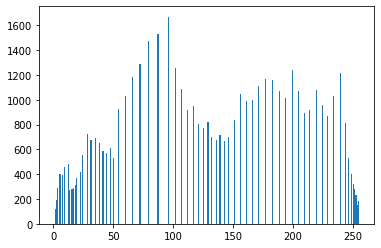

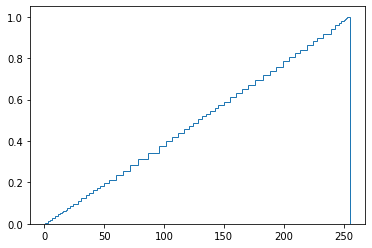

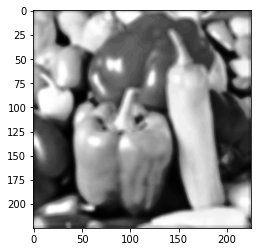

In [ ]:
# step 3 Histogram Equalization
grey_levels = bins.astype(int)

map = {}
new_grey_level = np.round(255*cdf, decimals = 0)

for i in range(cdf.shape[0]):
  map[grey_levels[i]] = new_grey_level[i]

new_im = np.zeros(avg_im.shape, dtype=np.uint8)
for i in range(avg_im.shape[0]):
  for j in range(avg_im.shape[1]):
    if np.round(avg_im[i,j],decimals=0) in map:
      # print(np.round(avg_im[i,j],decimals=0))
      new_im[i,j] = map[np.round(avg_im[i,j],decimals=0)]
    else:
      new_im[i,j] = 255

n2, bins2, patches2 = plt.hist(new_im.ravel(), bins = 255, histtype='bar')
plt.show() 
cdf2, bins2, patches2 = plt.hist(new_im.ravel(), bins=255, density=True, histtype='step',
                           cumulative=True, label='Empirical')
plt.show() 


plt.imshow(new_im, cmap='gray')


/usr/local/lib/python3.6/dist-packages/skimage/filters/rank/generic.py:119: UserWarning: Possible precision loss converting image of type int64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  out_dtype)
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:503: UserWarning: Downcasting int64 to uint8 without scaling because max value 71 fits in uint8
  return convert(image, np.uint8, force_copy)


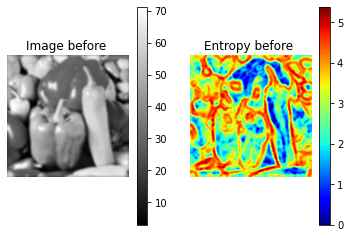

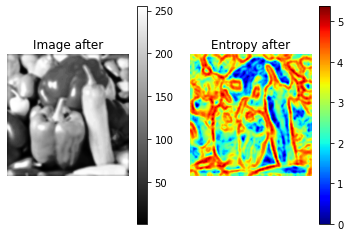

In [ ]:
# step 4 Entropy before and after histogram equalization
from skimage import data
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.util import img_as_ubyte

fig, (ax0, ax1) = plt.subplots( ncols=2)

img0 = ax0.imshow(avg_im, cmap=plt.cm.gray)
ax0.set_title('Image before ')
ax0.axis('off')
fig.colorbar(img0, ax=ax0)

img1 = ax1.imshow(entropy(avg_im, disk(4)), cmap=plt.cm.jet)
ax1.set_title('Entropy before ')
ax1.axis('off')
fig.colorbar(img1, ax=ax1)
plt.show()


fig2, (ax2, ax3) = plt.subplots( ncols=2)

img2 = ax2.imshow(new_im, cmap=plt.cm.gray)
ax2.set_title('Image after')
ax2.axis('off')
fig2.colorbar(img2, ax=ax2)


img3 = ax3.imshow(entropy(new_im, disk(4)), cmap=plt.cm.jet)
ax3.set_title('Entropy after')
ax3.axis('off')
fig2.colorbar(img3, ax=ax3)

plt.show()

# 2.3 Harris corner detection

Explain the basic idea of the Harris corner detection algorithm. Use the notion of eigenvalues and thresholds on these.

Harris corner detection algorithm is used to detect edges and corners efficiently. 
For this it, first taking sum of squared difference (SSD) between intensities through sliding window scaled with Gaussian or step patch SUM(w(x,y)*(I(x,y) - I(x-u,y-v))^2  ), we approximate it with 1st order Taylor series. What we got from there can be decomposed in a matrix form as [u v]M[u v]^T with M = sum(w(x,y)[[Ix^2 , Ix*Iy];[ Ix*Iy, Iy^2]]), Ix and Iy representing gradients in x and y directions. M matrix can be further decomposed as M = R [[e1, 0][0, e2]] R^T, so that its determinant is equal to multiplication of its eigenvalues, while trace of M is sum of the eigenvalues. 

This decomposition can be interpreted as R being rotation matrix, and e1 and e2 for scaling (if e1=e2) or as skew (if e1!=e2) transformation on [u, v] vector. So, depending on difference between these eigenvalues, we can conclude whether it is edge (large difference between eigenvalues ), corner (both are large, but approx same) or flat (both small and approx same ) region. Precisely, coeffient r is computed as r = det(M) - K*(trace(M))^2 = e1*e2 - K(e1+e2)^2, K being coeffient in range [0.04:0.06]. So, r < 0 for edges, r >> 0 for corner, else flat.


# 2.4 Non -Maxima suppression in Canny

Canny edge operator is done in 4 steps: starting from blurring with gaussian and finding gradient(magnitude and direction), use non maximum supression to thin edges to a single pixel width, then followed by linking and extending edge curves.

For the suppression,we keep a pixel with maximum intensity in a mask along an egde and suppress the others (even if gradient passes threshold) by comparing the pixels across direction of the gradient. This could be done by taking 3 by 3 mask with current pixel at the center and compare it with its neighbors  depending on rounded gradient angle : 0, 45, 90 and 135 degress. So, in case of 0 degree, the edge is vertical, therefore compare central pixel with pixels magnitudes in first and third columns of the mask, if 45 ,then with pixels expect for in diagonal of the mask.

For better accuracy, instead of central pixel gradient linear interpolation between the other 2 pixels not used for comparision (along gradient direction, not across ) is used.

# 2.5 Pyramids

 Blend two images (look into video 13). Use skimage.transform and only pyramid expand and pyramid reduce. You can generate the mask interactively. For those who are interested in blending try to do it pseudo automatically, and give criteria.

(900, 800, 3)


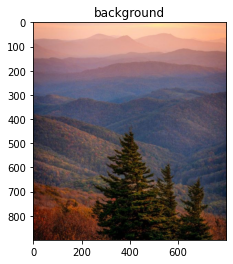

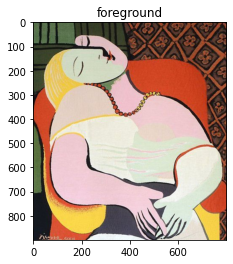

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from PIL import Image
# Step 1 Open the images

back = np.array(Image.open('drive/My Drive/Colab Notebooks/nature.jpg')).astype(np.uint8)
fore = np.array(Image.open('drive/My Drive/Colab Notebooks/thedream.jpg')).astype(np.uint8)

print(back.shape)
rows = back.shape[0]
cols = back.shape[1]
if back.shape != fore.shape:
  print("Not the same size")
plt.figure(1)
plt.title("background")
plt.imshow(back)
plt.figure(2)
plt.title("foreground")
plt.imshow(fore)


In [ ]:
import math
# math.log(min(rows,cols)/16,2)
pyramidN = math.ceil(math.log(min(rows,cols)/16,2))
print(pyramidN)

6


In [ ]:
down = []*6
len(down)

6

(450, 400, 3)
(225, 200, 3)
(113, 100, 3)
(57, 50, 3)
(29, 25, 3)
(15, 13, 3)
(900, 800, 3)
(450, 400, 3)
(225, 200, 3)
(113, 100, 3)
(57, 50, 3)
(29, 25, 3)


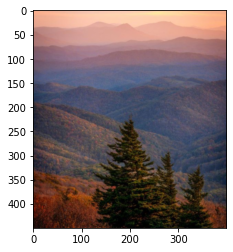

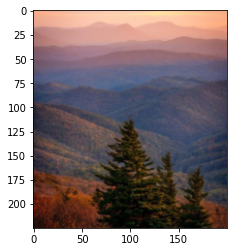

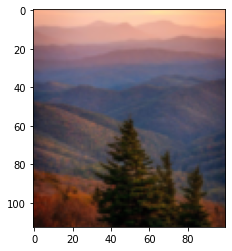

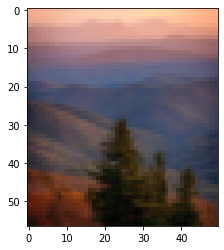

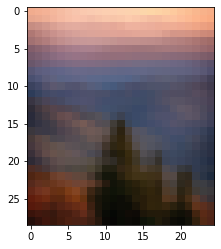

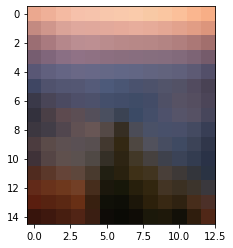

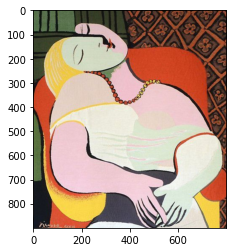

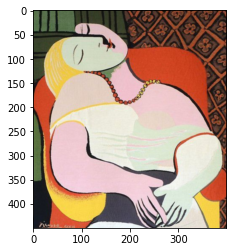

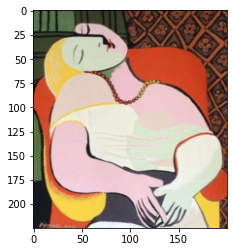

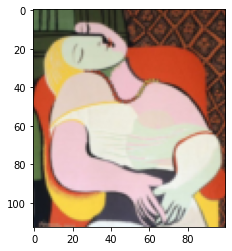

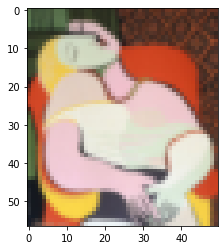

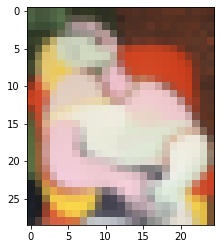

In [ ]:
#  create image pyramid for both fore nd back grounds
from skimage.transform import pyramid_expand, pyramid_reduce
down_back = []
down_fore = []
down_fore.append(fore)
temp = back
temp1= fore
for i in range(pyramidN):
  temp = pyramid_reduce(temp,multichannel=True)
  down_back.append(temp)
  temp1 = pyramid_reduce(temp1,multichannel=True)
  down_fore.append(temp1)

# for i in range(pyramidN):
#   print(down_back[i].shape)
#   plt.figure(i)
#   plt.imshow(down_back[i]) 
# for i in range(pyramidN):
#   print(down_fore[i].shape)
#   plt.figure(i+pyramidN)
#   plt.imshow(down_fore[i]) 
  

#2.6 SVD


Suppose we take the (full) Singular Value Decomposition (SVD)of a size 12000×30 matrix A. Give the sizes and special properties of the resulting matrices.

A = USV^T, if A is 12000x30, then U is 12000x12000, S is 12000x30 and V^T is 30x30. The eigenvectors of A^TA make up the columns of orthogonal V matrix  - right singular vectors , the eigenvectors of AA^T  make up the columns of orthogonal U matrix - left singular vectors. The values of diagonal matrix S are square roots of eigenvalues from AA^T. U and V^T can be interpreted as unitary rotation/reflection, while S is scaling transformation, given A as a linear transformation. For U and V their multiplication with their inverses give identity matrix, S is extended with zeros to match the sizes. 



#2.7 

Compute H(Y |X) in bits recalling p(x|y)p(y) = p(x, y) as given in the example at the end of Video 11.



The conditional entropy 
H(Y|X) = sum_over_x(p(X = x_i)H(Y|X=x_i)) = 
= - sum_over_x(p(X = x_i) * sum_over_y(p(Y = y_i|X = x_i)*log2(p(Y = y_i|X = x_i))) )


so according to the table from the example, for p1 = p(X=1) = p(X=1|Y=1) + p(X=1|Y=2) + p(X=1|Y=3)+ + p(X=1|Y=4) = 1/2. Similarly, for p2 =1/4 p3 =1/8 p4 = 1/8

Similar to X, we can also compute for Y: q1 = 1/4,  q2 = 1/4,  q3 = 1/4,  q4 = 1/4

Then conditional entropy is going to be as following:



*   H(Y|X) = -1/2*H(1/4, 1/8, 1/8, 1/2)- 1/4*H(1/4, 1/2, 1/4,0)- 1/8*H(1/4, 1/4, 1/2,0)-1/8*H(1/4, 1/4, 1/2,0) = 


